<h2>Task 1</h2><br>
Importing the diabetes data set from the sk learn library and inspecting its sample size and sample.

In [1]:
from sklearn.datasets import load_diabetes
sk_diabetes_data = load_diabetes()
print(sk_diabetes_data['data'].shape)

(442, 10)


<h2>Task 2</h2><br>
Splitting the dataset into training and testing splits.

In [2]:
from sklearn.model_selection import train_test_split
sk_x_train, sk_x_test, sk_y_train, sk_y_test = train_test_split(sk_diabetes_data['data'], sk_diabetes_data['target'], random_state = 311)
print(sk_x_train)

[[-0.05273755  0.05068012  0.09834182 ...  0.1081111   0.08449528
   0.04034337]
 [ 0.01991321 -0.04464164 -0.05794093 ... -0.03949338 -0.0611766
  -0.07563562]
 [ 0.03081083 -0.04464164  0.00564998 ...  0.1081111   0.06604821
   0.01963284]
 ...
 [-0.04910502 -0.04464164 -0.06440781 ... -0.04724262 -0.03324879
  -0.05492509]
 [ 0.0562386   0.05068012 -0.03099563 ... -0.03949338 -0.02952762
  -0.05906719]
 [ 0.02354575 -0.04464164 -0.03638469 ...  0.03430886 -0.03324879
   0.06105391]]


In [3]:
from sklearn import linear_model
lasso_model = linear_model.Lasso()
lasso_model.fit(sk_x_train, sk_y_train)

Lasso()

<h2>Task 3</h2><br>
Calculating the R^2 value for the training and test sets of the Scikit learn model

In [4]:
r2_training = lasso_model.score(sk_x_train, sk_y_train)
print("R^2 for sk learn training : {}".format(r2_training))
r2_test = lasso_model.score(sk_x_test, sk_y_test)
print("R^2 for sk learn test : {}".format(r2_test))

R^2 for sk learn training : 0.3612162357088038
R^2 for sk learn test : 0.33329688914040323


Feature selection by Lasso on normalized data

In [5]:
print(lasso_model.coef_)

[  0.          -0.         322.2832511    0.           0.
   0.          -0.           0.         353.96813516   0.        ]


In [6]:
import numpy as np
print("The following are the features selected by our Lasso Model:")
    
filtered_features_list = [sk_diabetes_data['feature_names'][x] for x in np.nonzero(lasso_model.coef_)[0]]
print(filtered_features_list)

The following are the features selected by our Lasso Model:
['bmi', 's5']


<h2>Task 4</h2><br>
Downloading the original dataset and the loading and splitting it into training and test sets

In [7]:
diabetes_path = "/Users/hardikrathod/Desktop/RHUL/ML/Labs and Assignments/Assignment_2/diabetes_data.txt"
og_diabetes_data = np.genfromtxt(diabetes_path, delimiter = "\t", usecols = np.arange(11), skip_header = 1)
og_diabetes_features = og_diabetes_data[:,:-1]
og_diabetes_labels = og_diabetes_data[:,-1]
print(og_diabetes_data)

[[ 59.       2.      32.1    ...   4.8598  87.     151.    ]
 [ 48.       1.      21.6    ...   3.8918  69.      75.    ]
 [ 72.       2.      30.5    ...   4.6728  85.     141.    ]
 ...
 [ 60.       2.      24.9    ...   4.1271  95.     132.    ]
 [ 36.       1.      30.     ...   5.1299  85.     220.    ]
 [ 36.       1.      19.6    ...   4.5951  92.      57.    ]]


<h2>Task 5</h2><br>
Splitting the newly loaded dataset into training and testing splits.

In [8]:
og_x_train, og_x_test, og_y_train, og_y_test = train_test_split(og_diabetes_features, og_diabetes_labels, random_state = 311)

In [9]:
print(og_x_train.shape)
print(og_y_train.shape)

(331, 10)
(331,)


<h2>Task 6</h2><br>
We fit a new Lasso model on the new training set and calculate the R^2 for training and test sets.

In [10]:
og_lasso_model = linear_model.Lasso()
og_lasso_model.fit(og_x_train, og_y_train)
og_r2_training = og_lasso_model.score(og_x_train, og_y_train)
print("R^2 for og diabetes training : {}".format(og_r2_training))
og_r2_test = og_lasso_model.score(og_x_test, og_y_test)
print("R^2 for og diabetes test : {}".format(og_r2_test))

R^2 for og diabetes training : 0.5137701693173085
R^2 for og diabetes test : 0.49252165153314786


As we can see in the above results, the R^2 for test and training for the original training data is higher than than the R^2 by 0.1<br>


In [11]:
print(og_lasso_model.coef_)

[ -0.2830046  -19.4769904    5.32107676   1.13263849   0.21349807
  -0.4707936   -0.93891354   5.69943178  33.57365174   0.33430492]


In [12]:
print("The following are the features used by our OG Lasso Model:")
    
og_filtered_features_list = [sk_diabetes_data['feature_names'][x] for x in np.nonzero(og_lasso_model.coef_)[0]]
print(og_filtered_features_list)

The following are the features used by our OG Lasso Model:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<h3>Difference between Lasso on scikit learn normalized data set and the original database</h3>
Normalized data weights :<br>
[  0.          -0.         322.2832511    0.           0.
   0.          -0.           0.         353.96813516   0.        ]<br>
1.As we observe when Lasso is applied on the normalized data set, since the values of all the features lies in the same range. Hence lasso worked better and we were able to exclude 8 features.<br>

Orignal data weights :<br>
[ -0.2830046  -19.4769904    5.32107676   1.13263849   0.21349807
  -0.4707936   -0.93891354   5.69943178  33.57365174   0.33430492]<br>
  
1.When we apply lasso to the original non-normalized data set, there is a large difference between the range of values of each feature. Hence the lasso algorithm performs poorly in eliminating features and ends up considering all of them.<br>

Hence we can say that the affect of lasso on normalized data sets is better than on non-normalized dataset. This is acheived by elimanting more number of features from the training et by setting their weights to 0.

2. R^2 comments:<br>


<h2>Task 7 :</h2><br>
Preprocess the training and test sets using StandardScaler method

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print("Before normalisation :\n{}".format(og_x_train[0]))
scaler.fit(og_x_train)
og_x_train_scaled = scaler.transform(og_x_train)
print("After normalisation :\n{}".format(og_x_train_scaled[0]))

scaler.fit(og_x_test)
og_x_test_scaled = scaler.transform(og_x_test)

Before normalisation :
[ 34.       2.      35.5    120.     233.     146.6     34.       7.
   5.5683 101.    ]
After normalisation :
[-1.03463368  1.07207773  2.00436733  1.91486693  1.22863872  0.99610647
 -1.24871822  2.23108677  1.69607527  0.81849703]


In [14]:
og_lasso_model = linear_model.Lasso()
og_lasso_model.fit(og_x_train_scaled, og_y_train) 

Lasso()

<h2>Task 8 :</h2><br>
Calculating the R^2 value for the training and test sets of the Dataset normalized using StandardScaler method

In [15]:
og_r2_training = og_lasso_model.score(og_x_train_scaled, og_y_train)
print("R^2 for Normalized Original Dataset training : {}".format(og_r2_training))
og_r2_test = og_lasso_model.score(og_x_test_scaled, og_y_test)
print("R^2 for Normalized Original Dataset test : {}".format(og_r2_test))

R^2 for Normalized Original Dataset training : 0.5166974081783697
R^2 for Normalized Original Dataset test : 0.49321953915434846


In [16]:
print(og_lasso_model.coef_)

[ -2.68624708 -10.37439784  23.17152165  14.10617377  -8.08854928
  -0.          -5.41897415   6.7459966   26.86686718   2.56117027]


In [17]:
print("The following are the features selected by our Lasso Model:")
    
filtered_features_list = [sk_diabetes_data['feature_names'][x] for x in np.nonzero(og_lasso_model.coef_)[0]]
print(filtered_features_list)

The following are the features selected by our Lasso Model:
['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']


Observations:
We can observe that the result of the original data when normalized is not similar to the results for the scikit learn normalized dataset.

We beleive that this difference is because of the different techniques used in each method.<br>

In in scikit learn scaled dataset, each of the 10 feature variables have been <b>mean centered and scaled by the standard deviation times 'n_samples'</b> where we get smaller R^2 values

In original scaled dataset, we use the StandardScalar technique.<br>
Which is standardizing the features by <b>making the mean 0 and scaling to unit variance</b> where we get bigger R^2 values<br>
The standard score of a sample x is calculated as:<br><br>

z = (x - u) / s

[StandardScalar Normalisation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler)

Hence, we can say that Lasso works well(does not eliminates relevant columns) when the data is centered at 0 distributed over unit variance as to when using a mean centered and scaled using std deviation.

<h2>Task 9</h2><br>
Varying the parameter α in the Lasso, plot the test R2 vs the number of features used

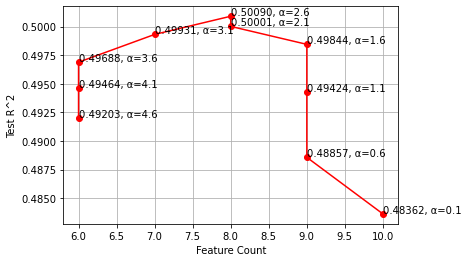

In [18]:
from matplotlib import pyplot as plt
score_list=[]
i=0.1
feature_list=[]
i_list = []
while i <= 5:
    og_lasso_model = linear_model.Lasso(alpha=i)
    og_lasso_model.fit(og_x_train_scaled, og_y_train)
    score_list.append(og_lasso_model.score(og_x_test_scaled, og_y_test))
    feature_list.append(np.count_nonzero(og_lasso_model.coef_))
    i_list.append(i)
    i += 0.5
    
ax = plt.axes()
plt.grid()
ax.set_xlabel("Feature Count")
ax.set_ylabel("Test R^2")
ax.plot(feature_list, score_list, 'ro-');

j=0
for x,y in zip(feature_list,score_list):
    label = "{:.5f}, α={}".format(y,i_list[j])
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,1), ha='left') 
    j +=1

In the above graph we can see that as the value of alpha increases from 0.01 to 2.6 with R^2 as 0.50090 with 8 features considered<br>
When the alpha value is more that 2.6 it starts decreasing at a constant rate with the number of features considered also decreasing to 6 at alpha 4.6

In [19]:
"""A different observation regarding scikit learn linear model lasso method:

When we try to pass alpha as a very small value like 1x10^-4 and smaller, then the code linear 
model itself gives an error saying that model was not able to converge within 1000 itterations. This is 
because the co-effiecient failed to reach the final stage.<br>
As seen below"""

# This does not work : 
og_lasso_model = linear_model.Lasso(alpha=0.00001)
og_lasso_model.fit(og_x_train, og_y_train)
print(og_lasso_model.score(og_x_test_scaled, og_y_test))

-39.666290332952116


/Users/hardikrathod/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.5664453032659, tolerance: 196.076098489426
  model = cd_fast.enet_coordinate_descent(


In [20]:
# It works when we pass the max_iter param which overwrites the default value of 1000:
og_lasso_model = linear_model.Lasso(alpha=0.00001, max_iter = 10000)
og_lasso_model.fit(og_x_train, og_y_train)
print(og_lasso_model.score(og_x_test_scaled, og_y_test))

-39.66629048501918


<h2>Task 10</h2>
Choosing the regularization parameter for the Lasso using cross-validation on the training set

In [21]:
from sklearn.model_selection import cross_val_score

best_alpha = np.NINF
best_score = 0
i=0.01
while i<=5:
    og_lasso_cv_model = linear_model.Lasso(alpha = i)
    og_lasso_cv_model.fit(og_x_train_scaled, og_y_train)
    og_r2_cv_train = cross_val_score(og_lasso_cv_model, og_x_train_scaled, og_y_train, cv=10)
    mean_score = np.mean(og_r2_cv_train)
    if mean_score > best_score:
        best_alpha = i;
        best_score = mean_score
    i += 0.01
        
print("Creating new Lasso with best alpha : {}\n".format(best_alpha))

og_best_lasso_model = linear_model.Lasso(alpha=best_alpha)
og_best_lasso_model.fit(og_x_train_scaled, og_y_train)

og_best_train_r2 =og_best_lasso_model.score(og_x_train_scaled, og_y_train)
og_best_test_r2 = og_best_lasso_model.score(og_x_test_scaled, og_y_test)
print("Training Score for Cross Val : {}".format(og_best_train_r2))
print("Test Score for Cross Val : {}".format(og_best_test_r2))

# print(og_lassoCV_model.coef_)
print("The following are the features selected by our Lasso Model:")
    
filtered_features_list = [sk_diabetes_data['feature_names'][x] for x in np.nonzero(og_lasso_cv_model.coef_)[0]]
print(filtered_features_list)

Creating new Lasso with best alpha : 0.20000000000000004

Training Score for Cross Val : 0.5192473086104548
Test Score for Cross Val : 0.4829802421269077
The following are the features selected by our Lasso Model:
['sex', 'bmi', 'bp', 's3', 's5']


<h2>Task 11:</h2><br>
<h3>a. Spliting the Original data training set into two parts: the calibration set of size 99 and the rest of the training set</h3>

In [22]:
og_true_train, og_calib_train, og_true_label, og_calib_label = train_test_split(og_x_train, og_y_train, test_size = 99, random_state=2110)
print("og_true_train :",og_true_train.shape)
print("og_calib_train :",og_calib_train.shape)
print("og_true_label :",og_true_label.shape)
print("og_calib_label :",og_calib_label.shape)

og_true_train : (232, 10)
og_calib_train : (99, 10)
og_true_label : (232,)
og_calib_label : (99,)


<h3>b. Preprocess the training set proper, calibration set, and test set using StandardScaler</h3>

In [23]:
new_scaler = StandardScaler()
new_scaler.fit(og_true_train)
og_true_train_scaled = new_scaler.transform(og_true_train)
og_calib_train_scaled = new_scaler.transform(og_calib_train)

print("True Train before scaling : ",og_true_train[0])
print("True Train after scaling : ",og_true_train_scaled[0])

True Train before scaling :  [ 62.       2.      33.3    114.     182.     114.      38.       5.
   5.0106  96.    ]
True Train after scaling :  [ 1.07864803  1.14891253  1.54230073  1.48717961 -0.24403578 -0.07292776
 -0.97652416  0.75236946  0.67041555  0.39667858]


<h3>c. Implementing Inductive conformal predictor</h3>

In [24]:
calib_best_alpha = np.NINF
calib_best_score = np.NINF
i=0.01
while i<=5:
    og_calib_model = linear_model.Lasso(alpha = i)
    og_calib_model.fit(og_true_train_scaled, og_true_label)
    og_calib_train = cross_val_score(og_calib_model, og_true_train_scaled, og_true_label, cv=5)
    calib_mean_score = np.mean(og_calib_train)
    if calib_mean_score > calib_best_score:
        calib_best_alpha = i;
        calib_best_score = calib_mean_score
    i += 0.01

og_calib_model_best_alpha = linear_model.Lasso(alpha = calib_best_alpha)   
og_calib_model_best_alpha.fit(og_true_train_scaled, og_true_label)
og_calib_lasso_predicted = og_calib_model_best_alpha.predict(og_calib_train_scaled)
print(og_calib_lasso_predicted)

[215.40333409 163.24577798 229.07029967 149.86814066 127.92371126
 125.5335831  234.89389878 113.36093212 189.98686717 133.6519492
 114.5692739  171.00667385  79.26675811  83.03757892 241.48783108
 118.24362859 148.64338359 130.35570656 159.3496704  166.61378432
 129.75329897 168.1024285  171.38728869 117.90563    131.04209182
 184.93341484 153.56686856 192.67018145 165.28305574 153.24236384
 182.14718929  97.57779489 275.88274181 185.81084098 111.84256636
 185.36111342  51.28808632  93.90555837 261.5716807  112.06725056
 155.90918445 196.78675671 147.36239066 139.745449   268.97093304
 292.89115694 247.14075582  72.83408424 170.41576694 235.66634973
  75.89514398 137.79477582  86.83067415  96.6686995  112.36693267
 212.90354953 210.04108841 154.12948446 230.04988334 166.76648586
 186.18911241 179.52757358 185.95537512 162.45678095 176.41768226
 258.4619648  210.77379313 229.44105652 119.68187671 116.25834449
 164.11512033 102.3885946  111.13647824  70.97553865 201.51265506
 171.684072

In [25]:
alpha_list = np.sort([abs(og_calib_label[index] - og_calib_lasso_predicted[index]) for index in range(len(og_calib_label))])

<h4>Calculating the value of K </h4>

In [26]:
import math
k_5 = math.ceil((1-0.05)*(len(alpha_list)+ 1))
print("k for 5% significance :",k_5)
k_20 = math.ceil((1-0.2)*(len(alpha_list)+ 1))
print("k for 20% significance :",k_20)

k for 5% significance : 95
k for 20% significance : 80


<h3>for 5% significance</h3>

In [27]:
og_true_predicted_labels = og_calib_model_best_alpha.predict(og_x_test_scaled)

In [28]:
alpha_intervals_list = [[og_true_predicted_labels[val]-k_5, og_true_predicted_labels[val]+k_5] for val in  range(len(og_true_predicted_labels))]
print("Interval list for 5% significance : ",[x[1]-x[0] for x in alpha_intervals_list])

Interval list for 5% significance :  [190.0, 190.0, 190.0, 190.0, 190.0, 190.00000000000003, 190.00000000000003, 190.0, 190.0, 190.0, 190.0, 190.00000000000003, 190.0, 190.00000000000003, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.00000000000003, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.00000000000003, 190.0, 190.0, 190.0, 190.0, 190.0]


In [29]:
accuracy_check_list = []
for index in range(len(alpha_intervals_list)):
    accuracy_check_list.append(alpha_intervals_list[index][0]<=og_y_test[index]<=alpha_intervals_list[index][1])
# print(accuracy_check_list)

In [30]:
error_rate_k5 = accuracy_check_list.count(False)/len(accuracy_check_list)
print("Eror rate for 5% significance :",error_rate_k5)

Eror rate for 5% significance : 0.0990990990990991


<h3>for 20% signaficance</h3>

In [31]:
alpha_intervals_list = [[og_true_predicted_labels[val]-k_20, og_true_predicted_labels[val]+k_20] for val in  range(len(og_true_predicted_labels))]
print("Interval list for 20% significance : ",[x[1]-x[0] for x in alpha_intervals_list])

Interval list for 20% significance :  [160.0, 160.0, 160.0, 160.0, 160.0, 160.00000000000003, 160.00000000000003, 160.0, 160.0, 160.0, 160.0, 160.00000000000003, 160.0, 160.00000000000003, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 159.99999999999997, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 159.99999999999997, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.00000000000003, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 159.99999999999997, 160.0, 160.0, 160.0, 159.99999999999997, 160.0, 160.0, 160.0, 160.0, 160.00000000000003, 160.0, 160.0, 160.0, 160.0, 160.0]


In [32]:
accuracy_check_list = []
for index in range(len(alpha_intervals_list)):
    accuracy_check_list.append(alpha_intervals_list[index][0]<=og_y_test[index]<=alpha_intervals_list[index][1])
# print(accuracy_check_list)
error_rate_k20 = accuracy_check_list.count(False)/len(accuracy_check_list)
print("Eror rate for 20% significance :",error_rate_k20)

Eror rate for 20% significance : 0.15315315315315314


<h2>Conclusion of 16 values :</h2>

a. The training and test R2 for the Lasso model with default parameters on the scikit-learn version of diabetes and the number of features used.<br><br>
R^2 for sk learn training : 0.3612162357088038<br>
R^2 for sk learn test : 0.33329688914040323<br>
Total features used : 2<br>
['bmi', 's5']

b. The training and test R2 for the Lasso model with default parameters on the original version of diabetes and the number of features used.<br><br>
R^2 for original diabetes training : 0.5166974081783697<br>
R^2 for original diabetes test : 0.49321953915434846<br>
Total features used : 10<br>
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

c. The training and test R2 for the Lasso model with default parameters on normalized version of diabetes; the number of features used.<br><br>
R^2 for Normalized Original Dataset training : 0.5166974081783697<br>
R^2 for Normalized Original Dataset test : 0.49321953915434846<br>
Total features used : 9<br>
['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']

d. The training and test R2 for the Lasso model with the best parameters chosen by cross-validation on your version of diabetes; the number of features used.<br><br>
Training Score for Cross Val : 0.5192473086104548<br>
Test Score for Cross Val : 0.4829802421269077<br>
Total features used : 5<br>
['sex', 'bmi', 'bp', 's3', 's5']<br>

e. The lengths of prediction intervals and their test error rates at signifi- cance levels 5% and 20% (if you are implementing an inductive conformal predictor).<br><br>
Eror rate for 5% significance : 0.15315315315315314<br>
Interval list for 5% significance :  [190.0, 190.0, 190.0, 190.0, 190.0, 190.00000000000003, 190.00000000000003, 190.0, 190.0, 190.0, 190.0, 190.00000000000003, 190.0, 190.00000000000003, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.00000000000003, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 189.99999999999997, 190.0, 190.0, 190.0, 190.0, 190.00000000000003, 190.0, 190.0, 190.0, 190.0, 190.0]<br><br>
Eror rate for 20% significance : 0.15315315315315314<br>
Interval list for 20% significance :  [160.0, 160.0, 160.0, 160.0, 160.0, 160.00000000000003, 160.00000000000003, 160.0, 160.0, 160.0, 160.0, 160.00000000000003, 160.0, 160.00000000000003, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 159.99999999999997, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 159.99999999999997, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.00000000000003, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 159.99999999999997, 160.0, 160.0, 160.0, 159.99999999999997, 160.0, 160.0, 160.0, 160.0, 160.00000000000003, 160.0, 160.0, 160.0, 160.0, 160.0]